## **DATA PREPROCESSING**

In [69]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the dataset
from google.colab import files
dataset = files.upload()

Saving customer_churn_large_dataset.xlsx to customer_churn_large_dataset.xlsx


In [14]:
#Read the data
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [18]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [16]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [44]:
#Handling Missing values
df.dropna(inplace=True)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Subscription_Length_Months'}>,
        <Axes: title={'center': 'Monthly_Bill'}>],
       [<Axes: title={'center': 'Total_Usage_GB'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

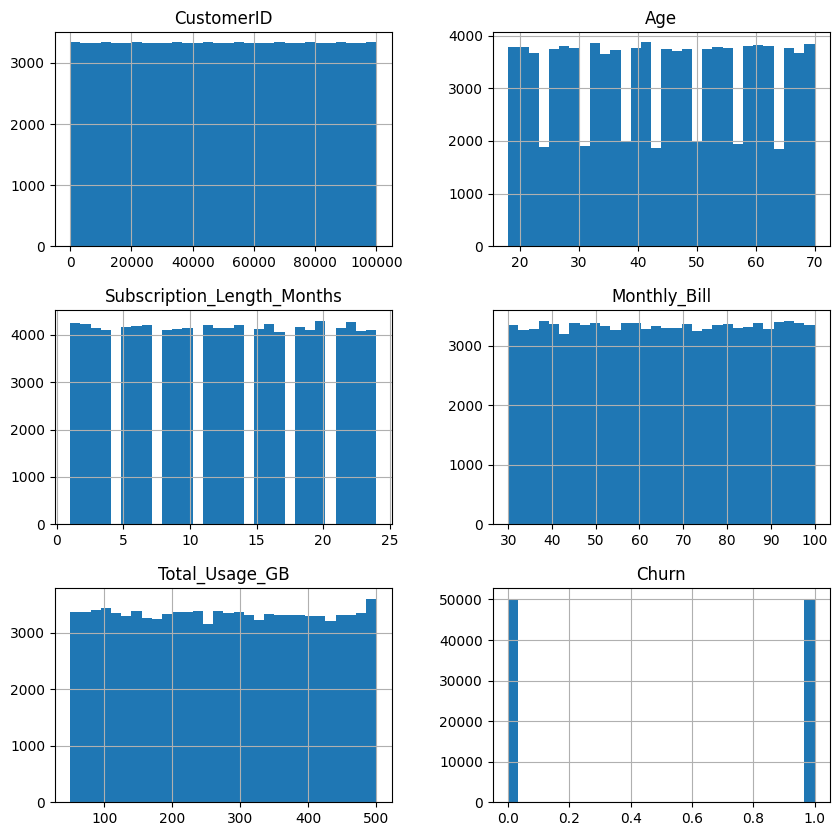

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10, 10))

## **FEATURE ENGINEERING**

In [66]:
corr_matrix = df.corr()
corr_matrix['Age'].sort_values(ascending=False)

<ipython-input-66-57e09d02aad7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Age                           1.000000
Subscription_Length_Months    0.003382
Total_Usage_GB                0.001927
Churn                         0.001559
Monthly_Bill                  0.001110
CustomerID                   -0.001085
Name: Age, dtype: float64

array([[<Axes: xlabel='Subscription_Length_Months', ylabel='Subscription_Length_Months'>,
        <Axes: xlabel='Monthly_Bill', ylabel='Subscription_Length_Months'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Subscription_Length_Months'>,
        <Axes: xlabel='Churn', ylabel='Subscription_Length_Months'>],
       [<Axes: xlabel='Subscription_Length_Months', ylabel='Monthly_Bill'>,
        <Axes: xlabel='Monthly_Bill', ylabel='Monthly_Bill'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Monthly_Bill'>,
        <Axes: xlabel='Churn', ylabel='Monthly_Bill'>],
       [<Axes: xlabel='Subscription_Length_Months', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Monthly_Bill', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Churn', ylabel='Total_Usage_GB'>],
       [<Axes: xlabel='Subscription_Length_Months', ylabel='Churn'>,
        <Axes: xlabel='Monthly_Bill', ylabel='Churn'>,
        <Axes: xlabel='Total_Usage_GB'

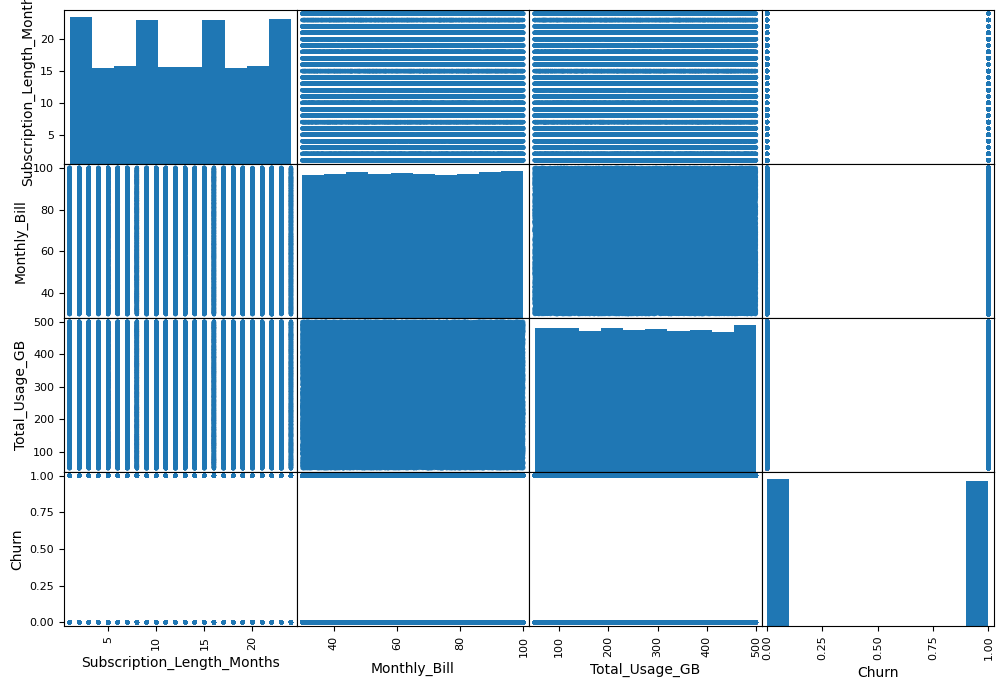

In [67]:
from pandas.plotting import scatter_matrix
attributes = ["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Churn"]
scatter_matrix(df[attributes], figsize = (12,8))

### **TRAIN-TEST SPLIT**

In [79]:
# Converting Categorical features to numerical
name_encoder = LabelEncoder()
df['Name_encoded'] = name_encoder.fit_transform(df['Name'])

gender_encoder = LabelEncoder()
df['Gender_encoded'] = gender_encoder.fit_transform(df['Gender'])

location_encoder = LabelEncoder()
df['Location_encoded'] = location_encoder.fit_transform(df['Location'])

LabelEncoder()

LabelEncoder()

In [ ]:
x = df.drop('Churn', axis=1)
y = df['Churn']

#Scale numerical features
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [74]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [75]:
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 80000
Rows in test set: 20000



In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Churn']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [77]:
strat_test_set['Churn'].value_counts()

0    10044
1     9956
Name: Churn, dtype: int64

## **MODEL BUILDING**

In [ ]:
# Create and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)


## **MODEL DEPLOYMENT**

In [81]:
from joblib import dump, load
dump(model, 'ChurnPrediction.joblib')

['ChurnPrediction.joblib']